# Decision Trees and Random Forests in Python

Jose Article : [blog post](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411#.hh7n1co54) explaining the general logic of decision trees and random forests.

* `Age` : in months
* `Number` , `Start`: associated Vertebrates numbers that are operated on

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
df = pd.read_csv('kyphosis.csv')

In [9]:
df.head()



,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


# EDA

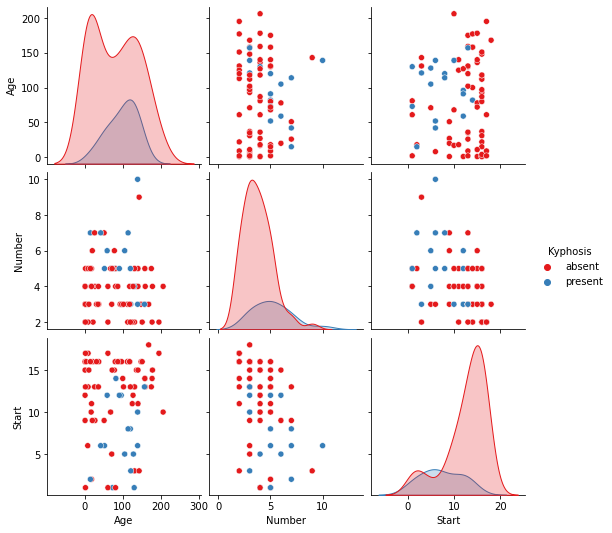

In [11]:
sns.pairplot(data=df, hue='Kyphosis', palette='Set1');

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Trees

We'll start just by training a single decision tree.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Prediction and Evaluation 

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



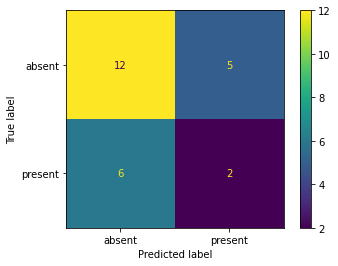

In [25]:
plot_confusion_matrix(dtree, X_test, y_test);

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [35]:
from sklearn.tree import plot_tree

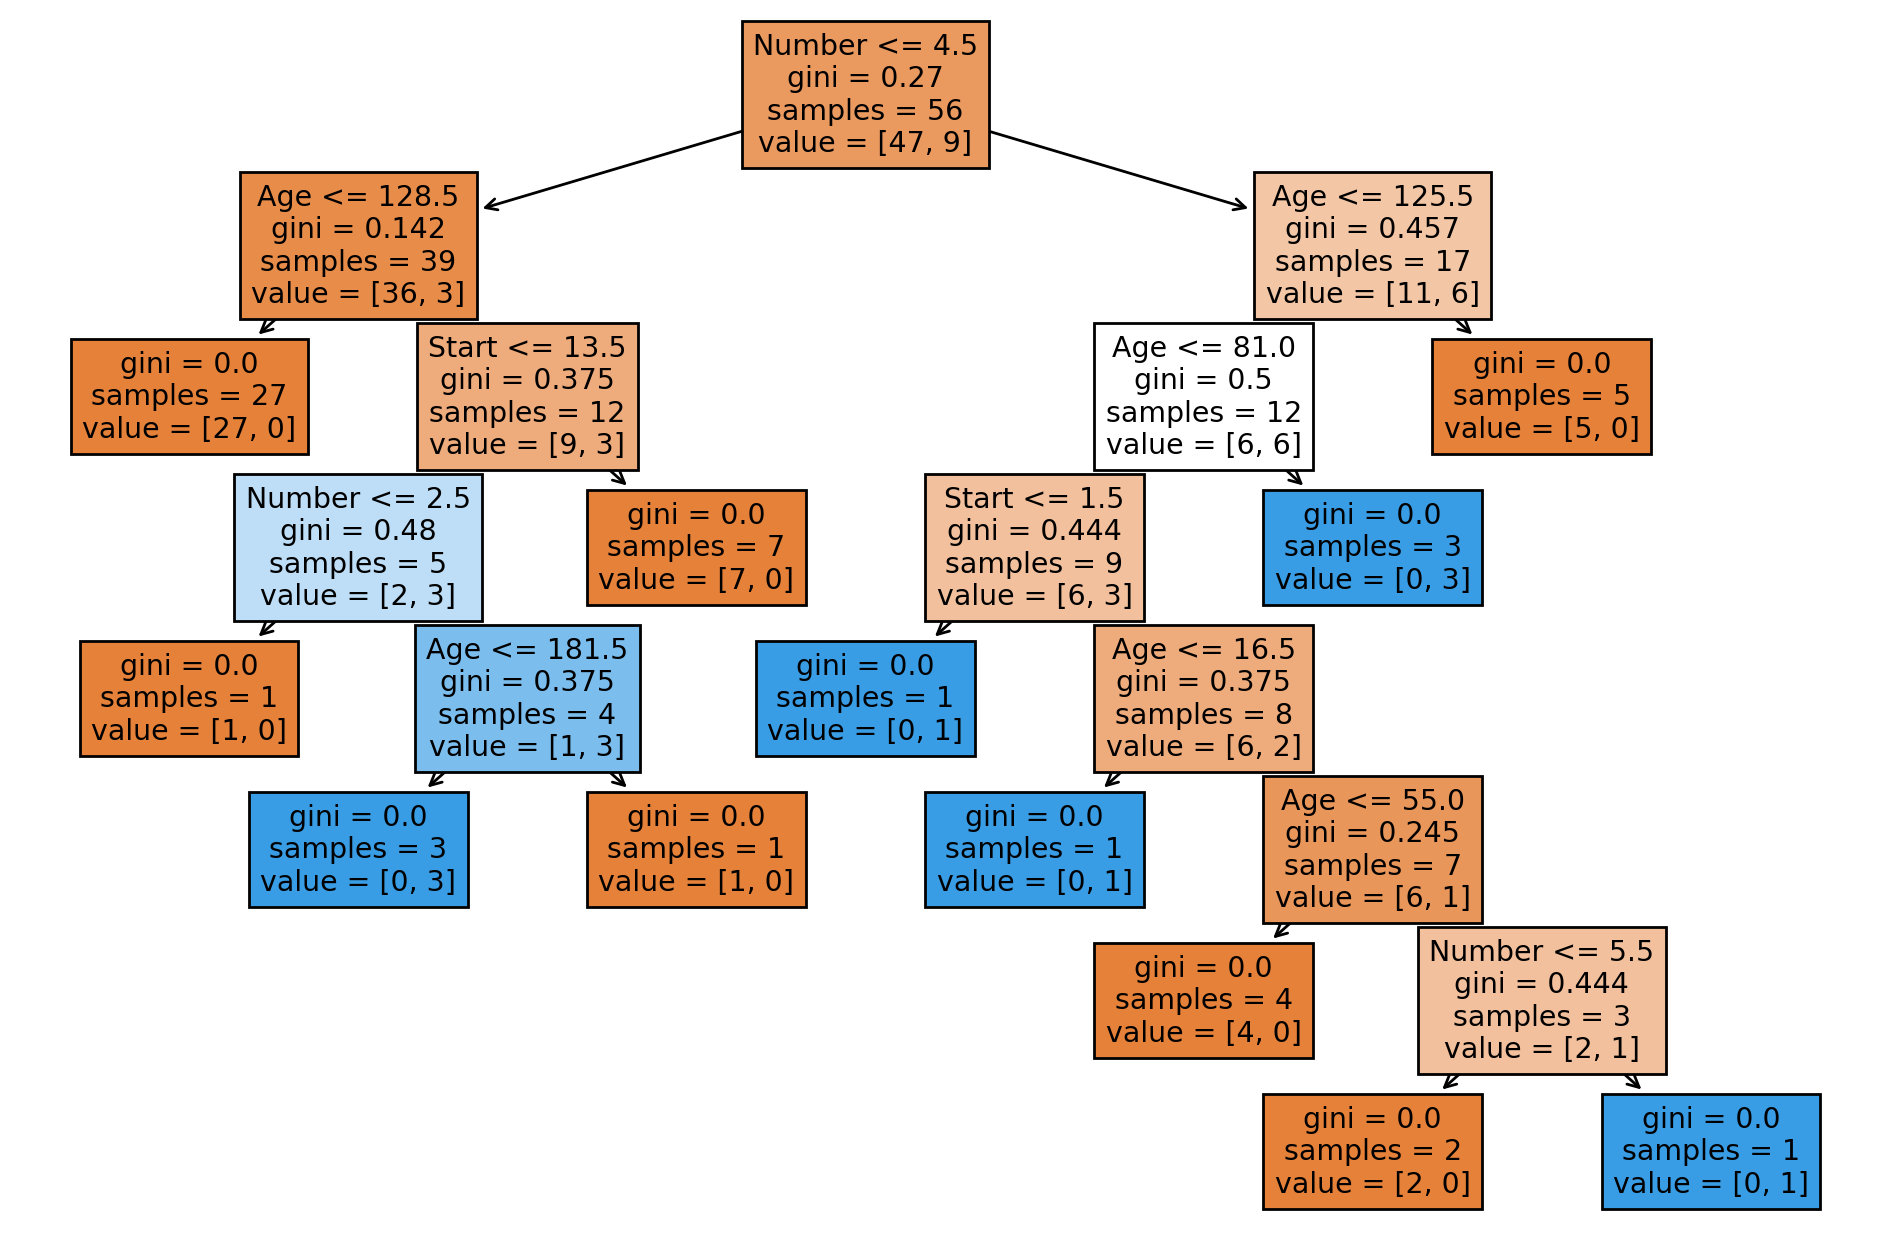

In [38]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(dtree, feature_names=X_train.columns, filled=True);

---------

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
predictions = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



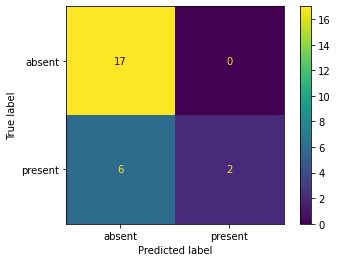

In [32]:
plot_confusion_matrix(rfc, X_test, y_test);

In [34]:
df['Kyphosis'].value_counts()

# as we can see the dataset is quite inbalanced.

absent     64
present    17
Name: Kyphosis, dtype: int64

------